In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
repertoire_types = ['T_cell_rich_low_SDI','T_cell_rich_high_SDI','T_cell_poor_low_SDI','T_cell_poor_high_SDI']

In [3]:
columns = ['th', 'observed_portion_frequency', 'class']
df_MIXCR = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_MIXCR_'+repertoire+'.csv')
    df_temp_aa['th'] = df_temp_aa['th']*100
    
    df_temp_aa['class'] = repertoire

    df_MIXCR = pd.concat([df_MIXCR, df_temp_aa], ignore_index=True, sort=False)
    df_MIXCR['tool'] = 'MIXCR'

In [4]:
columns = ['th', 'observed_portion_frequency', 'class']
df_IMREP = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_IMREP_'+repertoire+'.csv')
    df_temp_aa['th'] = df_temp_aa['th']*100

    df_temp_aa['class'] = repertoire

    df_IMREP = pd.concat([df_IMREP, df_temp_aa], ignore_index=True, sort=False)
    df_IMREP['tool'] = 'IMREP'

In [5]:
columns = ['th', 'observed_portion_frequency', 'class']
df_TRUST4 = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_TRUST4_'+repertoire+'.csv')
    df_temp_aa['th'] = df_temp_aa['th']*100

    df_temp_aa['class'] = repertoire

    df_TRUST4 = pd.concat([df_TRUST4, df_temp_aa], ignore_index=True, sort=False)
    df_TRUST4['tool'] = 'TRUST4'

In [6]:
columns = ['th', 'observed_portion_frequency', 'class']
df_CATT = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_CATT_'+repertoire+'.csv')
    df_temp_aa['th'] = df_temp_aa['th']*100

    df_temp_aa['class'] = repertoire

    df_CATT = pd.concat([df_CATT, df_temp_aa], ignore_index=True, sort=False)
    df_CATT['tool'] = 'CATT'

In [7]:
df_combined = pd.concat([df_MIXCR,df_IMREP,df_TRUST4,df_CATT], ignore_index=True, sort=False)
df_combined

,th,observed_portion_frequency,class,tool
0,0.000,0.928713,T_cell_rich_low_SDI,MIXCR
1,0.001,0.943874,T_cell_rich_low_SDI,MIXCR
2,0.002,0.946668,T_cell_rich_low_SDI,MIXCR
3,0.003,0.979478,T_cell_rich_low_SDI,MIXCR
4,0.004,0.989179,T_cell_rich_low_SDI,MIXCR
...,...,...,...,...
1599995,99.996,NaN,T_cell_poor_high_SDI,CATT
1599996,99.997,NaN,T_cell_poor_high_SDI,CATT
1599997,99.998,NaN,T_cell_poor_high_SDI,CATT
1599998,99.999,NaN,T_cell_poor_high_SDI,CATT


# MIXCR

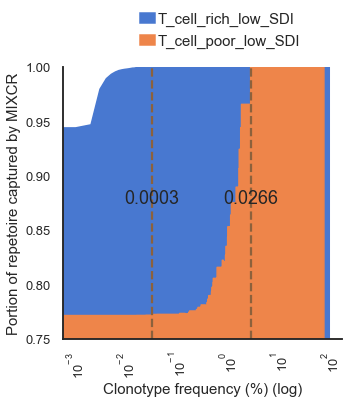

In [8]:
T_cell_rich_low_SDI_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_rich_low_SDI']
T_cell_poor_low_SDI_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_poor_low_SDI']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 5))

ax.stackplot(T_cell_rich_low_SDI_MIXCR['th'], T_cell_rich_low_SDI_MIXCR['observed_portion_frequency'], labels=["T_cell_rich_low_SDI"],color=['#4878d0'])
ax.stackplot(T_cell_poor_low_SDI_MIXCR['th'], T_cell_poor_low_SDI_MIXCR['observed_portion_frequency'], labels=["T_cell_poor_low_SDI"],color=['#ee854a'])
value1 = T_cell_rich_low_SDI_MIXCR.loc[T_cell_rich_low_SDI_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
ax.text(value1, 0.875, "{:.4f}".format(value1/100), ha='center')
value2 = T_cell_poor_low_SDI_MIXCR.loc[T_cell_poor_low_SDI_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
ax.text(value2, 0.875, "{:.4f}".format(value2/100), ha='center')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.25), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by MIXCR')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.75,1)

# setting label sizes after creation
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.savefig("../figures/main/figure1a.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1a.png",bbox_inches="tight")

plt.show()

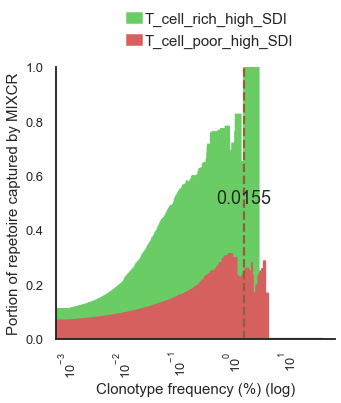

In [9]:
T_cell_rich_high_SDI_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_rich_high_SDI']
T_cell_poor_high_SDI_MIXCR = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_poor_high_SDI']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 5))

ax.stackplot(T_cell_rich_high_SDI_MIXCR['th'], T_cell_rich_high_SDI_MIXCR['observed_portion_frequency'], labels=["T_cell_rich_high_SDI"],color=['#6acc64'])
ax.stackplot(T_cell_poor_high_SDI_MIXCR['th'], T_cell_poor_high_SDI_MIXCR['observed_portion_frequency'], labels=["T_cell_poor_high_SDI"],color=['#d65f5f'])

value1 = T_cell_rich_high_SDI_MIXCR.loc[T_cell_rich_high_SDI_MIXCR['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
ax.text(value1, 0.5, "{:.4f}".format(value1/100), ha='center')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.25), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by MIXCR')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.savefig("../figures/main/figure1e.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1e.png",bbox_inches="tight")

plt.show()

# IMREP

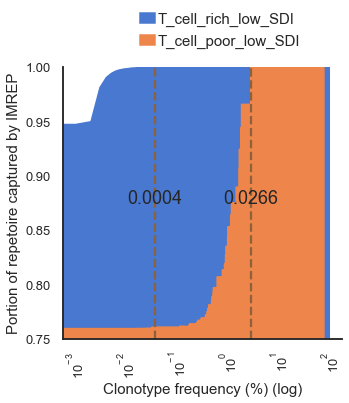

In [10]:
T_cell_rich_low_SDI_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_rich_low_SDI']
T_cell_poor_low_SDI_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_poor_low_SDI']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 5))

ax.stackplot(T_cell_rich_low_SDI_IMREP['th'], T_cell_rich_low_SDI_IMREP['observed_portion_frequency'], labels=["T_cell_rich_low_SDI"],color=['#4878d0'])
ax.stackplot(T_cell_poor_low_SDI_IMREP['th'], T_cell_poor_low_SDI_IMREP['observed_portion_frequency'], labels=["T_cell_poor_low_SDI"],color=['#ee854a'])

value1 = T_cell_rich_low_SDI_IMREP.loc[T_cell_rich_low_SDI_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
ax.text(value1, 0.875, "{:.4f}".format(value1/100), ha='center')
value2 = T_cell_poor_low_SDI_IMREP.loc[T_cell_poor_low_SDI_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
ax.text(value2, 0.875, "{:.4f}".format(value2/100), ha='center')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.25), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by IMREP')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.75,1)

# setting label sizes after creation
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.savefig("../figures/main/figure1b.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1b.png",bbox_inches="tight")

plt.show()

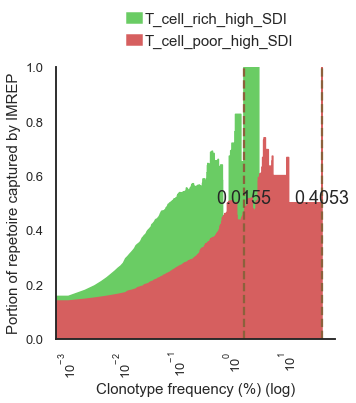

In [11]:
T_cell_rich_high_SDI_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_rich_high_SDI']
T_cell_poor_high_SDI_IMREP = df_IMREP.loc[df_IMREP['class'] == 'T_cell_poor_high_SDI']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 5))

ax.stackplot(T_cell_rich_high_SDI_IMREP['th'], T_cell_rich_high_SDI_IMREP['observed_portion_frequency'], labels=["T_cell_rich_high_SDI"],color=['#6acc64'])
ax.stackplot(T_cell_poor_high_SDI_IMREP['th'], T_cell_poor_high_SDI_IMREP['observed_portion_frequency'], labels=["T_cell_poor_high_SDI"],color=['#d65f5f'])

value1 = T_cell_rich_high_SDI_IMREP.loc[T_cell_rich_high_SDI_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
ax.text(value1, 0.5, "{:.4f}".format(value1/100), ha='center')
value2 = T_cell_poor_high_SDI_IMREP.loc[T_cell_poor_high_SDI_IMREP['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
ax.text(value2, 0.5, "{:.4f}".format(value2/100), ha='center')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.25), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by IMREP')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.savefig("../figures/main/figure1f.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1f.png",bbox_inches="tight")

plt.show()

# TRUST4

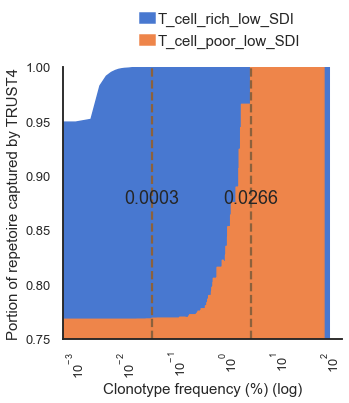

In [12]:
T_cell_rich_low_SDI_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_rich_low_SDI']
T_cell_poor_low_SDI_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_poor_low_SDI']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 5))

ax.stackplot(T_cell_rich_low_SDI_TRUST4['th'], T_cell_rich_low_SDI_TRUST4['observed_portion_frequency'], labels=["T_cell_rich_low_SDI"],color=['#4878d0'])
ax.stackplot(T_cell_poor_low_SDI_TRUST4['th'], T_cell_poor_low_SDI_TRUST4['observed_portion_frequency'], labels=["T_cell_poor_low_SDI"],color=['#ee854a'])

value1 = T_cell_rich_low_SDI_TRUST4.loc[T_cell_rich_low_SDI_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
ax.text(value1, 0.875, "{:.4f}".format(value1/100), ha='center')
value2 = T_cell_poor_low_SDI_TRUST4.loc[T_cell_poor_low_SDI_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
ax.text(value2, 0.875, "{:.4f}".format(value2/100), ha='center')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.25), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by TRUST4')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.75,1)

# setting label sizes after creation
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.savefig("../figures/main/figure1c.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1c.png",bbox_inches="tight")

plt.show()

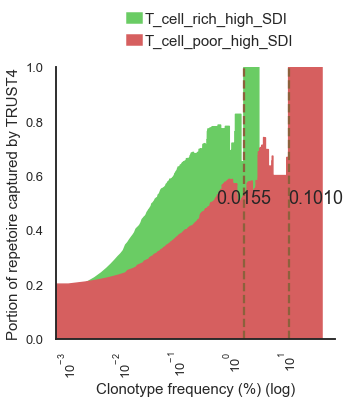

In [13]:
T_cell_rich_high_SDI_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_rich_high_SDI']
T_cell_poor_high_SDI_TRUST4 = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_poor_high_SDI']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 5))

ax.stackplot(T_cell_rich_high_SDI_TRUST4['th'], T_cell_rich_high_SDI_TRUST4['observed_portion_frequency'], labels=["T_cell_rich_high_SDI"],color=['#6acc64'])
ax.stackplot(T_cell_poor_high_SDI_TRUST4['th'], T_cell_poor_high_SDI_TRUST4['observed_portion_frequency'], labels=["T_cell_poor_high_SDI"],color=['#d65f5f'])

value1 = T_cell_rich_high_SDI_TRUST4.loc[T_cell_rich_high_SDI_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
ax.text(value1, 0.5, "{:.4f}".format(value1/100), ha='center')
value2 = T_cell_poor_high_SDI_TRUST4.loc[T_cell_poor_high_SDI_TRUST4['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
ax.text(value2, 0.5, "{:.4f}".format(value2/100), ha='left')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.25), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by TRUST4')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.savefig("../figures/main/figure1g.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1g.png",bbox_inches="tight")

plt.show()

## CATT

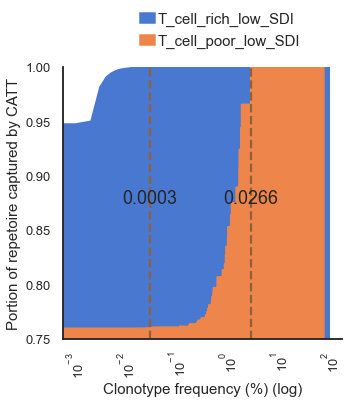

In [14]:
T_cell_rich_low_SDI_CATT = df_CATT.loc[df_CATT['class'] == 'T_cell_rich_low_SDI']
T_cell_poor_low_SDI_CATT = df_CATT.loc[df_CATT['class'] == 'T_cell_poor_low_SDI']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 5))

ax.stackplot(T_cell_rich_low_SDI_CATT['th'], T_cell_rich_low_SDI_CATT['observed_portion_frequency'], labels=["T_cell_rich_low_SDI"],color=['#4878d0'])
ax.stackplot(T_cell_poor_low_SDI_CATT['th'], T_cell_poor_low_SDI_CATT['observed_portion_frequency'], labels=["T_cell_poor_low_SDI"],color=['#ee854a'])

value1 = T_cell_rich_low_SDI_CATT.loc[T_cell_rich_low_SDI_CATT['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
ax.text(value1, 0.875, "{:.4f}".format(value1/100), ha='center')
value2 = T_cell_poor_low_SDI_CATT.loc[T_cell_poor_low_SDI_CATT['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
ax.text(value2, 0.875, "{:.4f}".format(value2/100), ha='center')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.25), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by CATT')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0.75,1)

# setting label sizes after creation
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.savefig("../figures/main/figure1d.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1d.png",bbox_inches="tight")

plt.show()

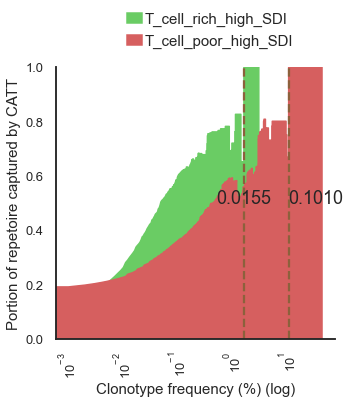

In [15]:
T_cell_rich_high_SDI_CATT = df_CATT.loc[df_CATT['class'] == 'T_cell_rich_high_SDI']
T_cell_poor_high_SDI_CATT = df_CATT.loc[df_CATT['class'] == 'T_cell_poor_high_SDI']

sns.set_style("white") 
sns.set_context("talk")  

fig, ax = plt.subplots(figsize=(5, 5))

ax.stackplot(T_cell_rich_high_SDI_CATT['th'], T_cell_rich_high_SDI_CATT['observed_portion_frequency'], labels=["T_cell_rich_high_SDI"],color=['#6acc64'])
ax.stackplot(T_cell_poor_high_SDI_CATT['th'], T_cell_poor_high_SDI_CATT['observed_portion_frequency'], labels=["T_cell_poor_high_SDI"],color=['#d65f5f'])

value1 = T_cell_rich_high_SDI_CATT.loc[T_cell_rich_high_SDI_CATT['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value1, color='#8c613c',ls='--')
ax.text(value1, 0.5, "{:.4f}".format(value1/100), ha='center')
value2 = T_cell_poor_high_SDI_CATT.loc[T_cell_poor_high_SDI_CATT['observed_portion_frequency'] == 1]['th'].values[0]
ax.axvline(x = value2, color='#8c613c',ls='--')
ax.text(value2, 0.5, "{:.4f}".format(value2/100), ha='left')

locs, labels = plt.xticks()
plt.legend(bbox_to_anchor=(0.9,1.25), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
ax.set_ylabel('Portion of repetoire captured by CATT')
ax.set_xlabel('Clonotype frequency (%) (log)')
ax.set_xscale('log')
ax.set_ylim(0,1)

# setting label sizes after creation
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.savefig("../figures/main/figure1h.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1h.png",bbox_inches="tight")

plt.show()

In [16]:
portion = df_combined.loc[df_combined['th'] == 0]
mean_portion = portion.groupby(["class"])["observed_portion_frequency"].agg(["mean", "std"]) 
display(mean_portion)

,mean,std
class,,
T_cell_poor_high_SDI,0.146187,0.060214
T_cell_poor_low_SDI,0.764494,0.005988
T_cell_rich_high_SDI,0.112217,0.022407
T_cell_rich_low_SDI,0.931959,0.002369


In [17]:
df = pd.read_csv("../summary_data/original/all_tools_TRB.csv")
df = df.loc[~(df['frequency_TCR'] == 0)]
df

,Sample,CDR3,nReads_TCR,nReads_CATT,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,tissue,tissue_type,total_reads_TCR,...,total_reads_IMREP,total_reads_TRUST4,total_reads_CATT,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,frequency_CATT,repertoire_type,class
0,SRR5233637,CASSPRVTSGTYEQYF,32.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,...,315.0,544.0,5616.0,0.000010,0.0,0.0,0.0,0.0,high_SDI,T_cell_poor_high_SDI
1,SRR5233637,CASSYSDRGGQPQHF,13.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,...,315.0,544.0,5616.0,0.000004,0.0,0.0,0.0,0.0,high_SDI,T_cell_poor_high_SDI
2,SRR5233637,CASKVALGGETQYF,25.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,...,315.0,544.0,5616.0,0.000008,0.0,0.0,0.0,0.0,high_SDI,T_cell_poor_high_SDI
3,SRR5233637,CASRAPGTGTLGSPLHF,66.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,...,315.0,544.0,5616.0,0.000022,0.0,0.0,0.0,0.0,high_SDI,T_cell_poor_high_SDI
4,SRR5233637,CASSSGQGGPSTEAFF,52.0,0.0,0.0,0.0,0.0,small_intestine,T_cell_poor,3047629.0,...,315.0,544.0,5616.0,0.000017,0.0,0.0,0.0,0.0,high_SDI,T_cell_poor_high_SDI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378870,sample14,CASSPRVAIVYNEQFF,4.0,0.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,...,152.0,351.0,751.0,0.000005,0.0,0.0,0.0,0.0,high_SDI,T_cell_poor_high_SDI
378871,sample14,CASSYRQSGELFF,77.0,0.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,...,152.0,351.0,751.0,0.000103,0.0,0.0,0.0,0.0,high_SDI,T_cell_poor_high_SDI
378872,sample14,CASSQGGSGGPGELFF,48.0,0.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,...,152.0,351.0,751.0,0.000064,0.0,0.0,0.0,0.0,high_SDI,T_cell_poor_high_SDI
378873,sample14,CASSVSSGGFREVEQYF,15.0,0.0,0.0,0.0,0.0,melanoma,T_cell_poor,749686.0,...,152.0,351.0,751.0,0.000020,0.0,0.0,0.0,0.0,high_SDI,T_cell_poor_high_SDI


In [18]:
# Select 5 clonotypes with the highest frequencies for each sample 
df_top5 = pd.DataFrame()

samples = ['sample01','sample02','sample03','sample04','sample05','sample06','sample07','sample08',
           'sample09','sample10','sample11','sample12','sample13','sample14','TCGA-CZ-4862',
           'TCGA-CZ-5463','TCGA-CZ-5985','SRR5233637','SRR5233639']

for sample in samples: 
    df_sample = df.loc[df['Sample'] == sample]
    df_temp_top = df_sample.nlargest(5,'frequency_TCR')
    
    df_top5 = pd.concat([df_top5, df_temp_top], ignore_index=True, sort=False)

In [19]:
## Calculate the coverage of the top 5 clonotypes by each tool 
# TCR 
TCR_top5 = df_top5.groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TCR'].count().reset_index().rename(columns={'frequency_TCR':'count_TCR_top5'})

# MIXCR
MIXCR_top5 = df_top5[df_top5['frequency_MIXCR'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_MIXCR'].count().reset_index().rename(columns={'frequency_MIXCR':'count_tool_top5'})
MIXCR_top5 = pd.merge(TCR_top5, MIXCR_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
MIXCR_top5['tool'] = 'MIXCR'

# IMREP
IMREP_top5 = df_top5[df_top5['frequency_IMREP'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_IMREP'].count().reset_index().rename(columns={'frequency_IMREP':'count_tool_top5'})
IMREP_top5 = pd.merge(TCR_top5, IMREP_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
IMREP_top5['tool'] = 'IMREP'

# TRUST4
TRUST4_top5 = df_top5[df_top5['frequency_TRUST4'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TRUST4'].count().reset_index().rename(columns={'frequency_TRUST4':'count_tool_top5'})
TRUST4_top5 = pd.merge(TCR_top5, TRUST4_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
TRUST4_top5['tool'] = 'TRUST4'

# CATT
CATT_top5 = df_top5[df_top5['frequency_CATT'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_CATT'].count().reset_index().rename(columns={'frequency_CATT':'count_tool_top5'})
CATT_top5 = pd.merge(TCR_top5, CATT_top5, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
CATT_top5['tool'] = 'CATT'

overlap_count_top5 = pd.concat([MIXCR_top5,IMREP_top5,TRUST4_top5,CATT_top5],ignore_index=True)
overlap_count_top5['overlap_percentage'] = overlap_count_top5['count_tool_top5']/overlap_count_top5['count_TCR_top5']*100

In [20]:
mean_overlap_percentage = overlap_count_top5.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
display(mean_overlap_percentage)
tools = ['MIXCR','IMREP','TRUST4','CATT']              
for tool in tools: 
    print(tool)
    df_tool = overlap_count_top5.loc[overlap_count_top5['tool'] == tool]
    mean_overlap_percentage = df_tool.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
    display(mean_overlap_percentage)

,mean,std
class,,
T_cell_poor_high_SDI,40.833333,30.023631
T_cell_poor_low_SDI,40.000000,0.000000
T_cell_rich_high_SDI,68.333333,36.639108
T_cell_rich_low_SDI,98.333333,5.773503


MIXCR


,mean,std
class,,
T_cell_poor_high_SDI,31.666667,34.59725
T_cell_poor_low_SDI,40.000000,NaN
T_cell_rich_high_SDI,66.666667,41.63332
T_cell_rich_low_SDI,100.000000,0.00000


IMREP


,mean,std
class,,
T_cell_poor_high_SDI,36.666667,29.336088
T_cell_poor_low_SDI,40.000000,NaN
T_cell_rich_high_SDI,60.000000,34.641016
T_cell_rich_low_SDI,93.333333,11.547005


TRUST4


,mean,std
class,,
T_cell_poor_high_SDI,48.333333,28.867513
T_cell_poor_low_SDI,40.000000,NaN
T_cell_rich_high_SDI,73.333333,46.188022
T_cell_rich_low_SDI,100.000000,0.000000


CATT


,mean,std
class,,
T_cell_poor_high_SDI,46.666667,27.413777
T_cell_poor_low_SDI,40.000000,NaN
T_cell_rich_high_SDI,73.333333,46.188022
T_cell_rich_low_SDI,100.000000,0.000000


In [21]:
# Select 10 clonotypes with the highest frequencies for each sample 
df_top10 = pd.DataFrame()

samples = ['sample01','sample02','sample03','sample04','sample05','sample06','sample07','sample08',
           'sample09','sample10','sample11','sample12','sample13','sample14','TCGA-CZ-4862',
           'TCGA-CZ-5463','TCGA-CZ-5985','SRR5233637','SRR5233639']

for sample in samples: 
    df_sample = df.loc[df['Sample'] == sample]
    df_temp_top = df_sample.nlargest(10,'frequency_TCR')
    
    df_top10 = pd.concat([df_top10, df_temp_top], ignore_index=True, sort=False)

In [22]:
## Calculate the coverage of the top 10 clonotypes by each tool 
# TCR 
TCR_top10 = df_top10.groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TCR'].count().reset_index().rename(columns={'frequency_TCR':'count_TCR_top10'})

# MIXCR
MIXCR_top10 = df_top10[df_top10['frequency_MIXCR'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_MIXCR'].count().reset_index().rename(columns={'frequency_MIXCR':'count_tool_top10'})
MIXCR_top10 = pd.merge(TCR_top10, MIXCR_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
MIXCR_top10['tool'] = 'MIXCR'

# IMREP
IMREP_top10 = df_top10[df_top10['frequency_IMREP'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_IMREP'].count().reset_index().rename(columns={'frequency_IMREP':'count_tool_top10'})
IMREP_top10 = pd.merge(TCR_top10, IMREP_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
IMREP_top10['tool'] = 'IMREP'

# TRUST4
TRUST4_top10 = df_top10[df_top10['frequency_TRUST4'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_TRUST4'].count().reset_index().rename(columns={'frequency_TRUST4':'count_tool_top10'})
TRUST4_top10 = pd.merge(TCR_top10, TRUST4_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
TRUST4_top10['tool'] = 'TRUST4'

# CATT
CATT_top10 = df_top10[df_top10['frequency_CATT'] != 0].groupby(['Sample','tissue_type','repertoire_type','class'])['frequency_CATT'].count().reset_index().rename(columns={'frequency_CATT':'count_tool_top10'})
CATT_top10 = pd.merge(TCR_top10, CATT_top10, how='outer', on=['Sample','tissue_type','repertoire_type','class']).fillna(0)
CATT_top10['tool'] = 'CATT'

overlap_count_top10 = pd.concat([MIXCR_top10,IMREP_top10,TRUST4_top10,CATT_top10],ignore_index=True)
overlap_count_top10['overlap_percentage'] = overlap_count_top10['count_tool_top10']/overlap_count_top10['count_TCR_top10']*100

In [23]:
mean_overlap_percentage = overlap_count_top10.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
display(mean_overlap_percentage)
tools = ['MIXCR','IMREP','TRUST4','CATT']              
for tool in tools: 
    print(tool)
    df_tool = overlap_count_top10.loc[overlap_count_top10['tool'] == tool]
    mean_overlap_percentage = df_tool.groupby(["class"])["overlap_percentage"].agg(["mean", "std"]) 
    display(mean_overlap_percentage)

,mean,std
class,,
T_cell_poor_high_SDI,33.750000,28.778316
T_cell_poor_low_SDI,20.000000,0.000000
T_cell_rich_high_SDI,54.166667,37.284736
T_cell_rich_low_SDI,92.500000,7.537784


MIXCR


,mean,std
class,,
T_cell_poor_high_SDI,25.000000,28.762349
T_cell_poor_low_SDI,20.000000,NaN
T_cell_rich_high_SDI,50.000000,45.825757
T_cell_rich_low_SDI,93.333333,5.773503


IMREP


,mean,std
class,,
T_cell_poor_high_SDI,29.166667,28.109634
T_cell_poor_low_SDI,20.000000,NaN
T_cell_rich_high_SDI,46.666667,40.414519
T_cell_rich_low_SDI,86.666667,11.547005


TRUST4


,mean,std
class,,
T_cell_poor_high_SDI,42.500000,31.658691
T_cell_poor_low_SDI,20.000000,NaN
T_cell_rich_high_SDI,60.000000,40.000000
T_cell_rich_low_SDI,96.666667,5.773503


CATT


,mean,std
class,,
T_cell_poor_high_SDI,38.333333,26.571801
T_cell_poor_low_SDI,20.000000,NaN
T_cell_rich_high_SDI,60.000000,45.825757
T_cell_rich_low_SDI,93.333333,5.773503
